In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
division = pd.read_csv('input_DecreaseRate.csv')
subtraction = pd.read_csv('input_microSubtraction.csv')
mix = pd.read_csv('input_mixed_over60%.csv')

In [7]:
print(division.head(), '\n',division.shape )

   Strain  Orien  Aspect  Size  Decrease
0       2      4    0.29   174     10.92
1       2      4    0.12   925     24.86
2       2      2    0.34   230      7.83
3       2      2    0.18   441     29.71
4       3      1    0.40   129     21.71 
 (160, 5)


In [23]:
# division['Size'] = division['Size']*0.091463415

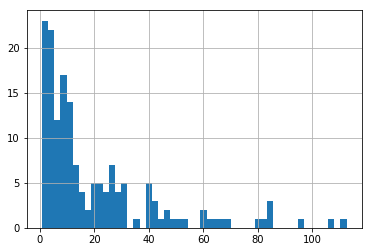

In [24]:
division.Size.hist(bins=50)

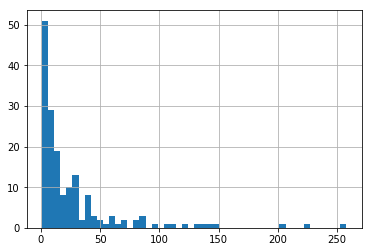

In [25]:
subtraction.Size.hist(bins=50)

In [8]:
print(subtraction.head(), '\n',subtraction.shape )

   Strain  Orien    Aspect    Size  Subtraction
0       1      4  0.589215  203.32       117.53
1       2      4  0.290944   15.91        13.29
2       3      1  0.256198  257.93       202.06
3       2      4  0.120000   84.60        52.88
4       2      2  0.340909   21.04        18.55 
 (168, 5)


In [9]:
subtraction_fixed = subtraction.copy()

In [10]:
for index, i in enumerate(subtraction_fixed.Aspect):
    if i<=0.28:
        subtraction_fixed.Aspect[index] = 1
    elif i>0.28 and i<=0.38:
        subtraction_fixed.Aspect[index] = 2
    elif i>0.38 and i<=0.51:
        subtraction_fixed.Aspect[index] = 3
    elif i>0.51 and i<0.66:
        subtraction_fixed.Aspect[index] = 4
    else:
        subtraction_fixed.Aspect[index] = 5

In [11]:
for index, i in enumerate(subtraction_fixed.Size):
    if i<=4.1:
        subtraction_fixed.Size[index] = 1
    elif i>4.1 and i<=8.5:
        subtraction_fixed.Size[index] = 2
    elif i>8.5 and i<=18.4:
        subtraction_fixed.Size[index] = 3
    elif i>18.4 and i<40.4:
        subtraction_fixed.Size[index] = 4
    else:
        subtraction_fixed.Size[index] = 5

In [12]:
subtraction_fixed.head()

,Strain,Orien,Aspect,Size,Subtraction
0,1,4,4.0,5.0,117.53
1,2,4,2.0,3.0,13.29
2,3,1,1.0,5.0,202.06
3,2,4,1.0,5.0,52.88
4,2,2,2.0,4.0,18.55


In [18]:
subtraction_fixed.Size.value_counts()

2.0    35
4.0    34
1.0    33
3.0    33
5.0    33
Name: Size, dtype: int64

In [13]:
subtraction_fixed.dtypes

Strain           int64
Orien            int64
Aspect         float64
Size           float64
Subtraction    float64
dtype: object

In [14]:
subtraction_fixed.columns.values

array(['Strain', 'Orien', 'Aspect', 'Size', 'Subtraction'], dtype=object)

In [15]:
subtraction_ready = subtraction_fixed.astype({'Strain':str,'Orien':str,'Aspect':str,'Size':str})

In [16]:
subtraction_ready.dtypes

Strain          object
Orien           object
Aspect          object
Size            object
Subtraction    float64
dtype: object

In [515]:
subtraction_ready.to_csv('subtraction_before_dummy.csv', index=False)

In [516]:
subtraction_ready = pd.get_dummies(subtraction_ready)

In [517]:
subtraction_ready.head()

,Subtraction,Strain_1,Strain_2,Strain_3,Strain_4,Orien_1,Orien_2,Orien_3,Orien_4,Aspect_1.0,Aspect_2.0,Aspect_3.0,Aspect_4.0,Aspect_5.0,Size_1.0,Size_2.0,Size_3.0,Size_4.0,Size_5.0
0,117.53,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,13.29,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,202.06,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,52.88,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,18.55,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [518]:
subtraction_ready['sub'] = subtraction_ready['Subtraction']
subtraction_ready.drop('Subtraction', axis=1, inplace=True)

In [519]:
subtraction_ready.to_csv('subtraction_get_dummy.csv', index=False)